In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
data = pd.read_csv("data.csv")
data.drop(["Unnamed: 0", "index"], axis=1, inplace=True)
data.head()

,totPurchaseAmt,street1,zip,property,ZillowURL,zpid,streetAddress,zipcode,city,state,latitude,longitude,dateSold,bathrooms,bedrooms,livingArea,yearBuilt,lotSize,homeType,homeStatus,photoCount,imageLink,daysOnZillow,isFeatured,shouldHighlight,brokerId,zestimate,rentZestimate,listing_sub_type,priceReduction,isUnmappable,rentalPetsFlags,mediumImageLink,isPreforeclosureAuction,homeStatusForHDP,festimate,isListingOwnedByCurrentSignedInAgent,isListingClaimedByCurrentSignedInUser,hiResImageLink,watchImageLink,tvImageLink,tvCollectionImageLink,tvHighResImageLink,zillowHasRightsToImages,desktopWebHdpImageLink,isNonOwnerOccupied,hideZestimate,isPremierBuilder,isZillowOwned,currency,country,taxAssessedValue,streetAddressOnly,unit,averageSchoolRating,description,price,priceForHDP,hoaFee,contactPhone,status
0,152000.0,538 78th Avenue NE,55432.0,538 78th Avenue NE 55432,https://www.zillow.com/homedetails/538-78th-Av...,1475959,538 78th Ave NE,55432,Spring Lake Park,MN,45.108779,-93.257808,1569308400000,1.0,2.0,1300.0,1984,1225,CONDO,RECENTLY_SOLD,4,https://photos.zillowstatic.com/p_g/IS1fwt0hhf...,174,False,False,0,158110.0,1150.0,NaN,NaN,False,64.0,https://photos.zillowstatic.com/p_c/IS1fwt0hhf...,False,RECENTLY_SOLD,158110.0,False,False,https://photos.zillowstatic.com/p_f/IS1fwt0hhf...,https://photos.zillowstatic.com/p_j/IS1fwt0hhf...,https://photos.zillowstatic.com/p_m/IS1fwt0hhf...,https://photos.zillowstatic.com/p_l/IS1fwt0hhf...,https://photos.zillowstatic.com/p_n/IS1fwt0hhf...,True,https://photos.zillowstatic.com/p_h/IS1fwt0hhf...,NaN,False,False,False,USD,USA,-1.0,538 78th Ave NE,,4.000000,"Just move in! End unit, deck, double garage, w...",152000.0,152000.0,230.0,NaN,Completed
1,198000.0,14649 Iodine Ct NW,55303.0,14649 Iodine Ct NW 55303,https://www.zillow.com/homedetails/14649-Iodin...,1539563,14649 Iodine Ct NW,55303,Ramsey,MN,45.237189,-93.409535,1568271600000,2.0,4.0,1716.0,1996,10716,SINGLE_FAMILY,RECENTLY_SOLD,0,https://www.zillowstatic.com/static/images/nop...,215,False,False,0,285985.0,1775.0,NaN,NaN,False,192.0,https://www.zillowstatic.com/static/images/nop...,False,RECENTLY_SOLD,285985.0,False,False,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,True,https://www.zillowstatic.com/static/images/nop...,NaN,False,False,False,USD,USA,-1.0,14649 Iodine Ct NW,,5.333333,"14649 Iodine Ct NW, Ramsey, MN is a single fam...",198000.0,198000.0,NaN,NaN,Completed
2,130000.0,10921 Dogwood Street,55448.0,10921 Dogwood Street 55448,https://www.zillow.com/homedetails/10921-Dogwo...,1503295,10921 Dogwood St NW,55448,Coon Rapids,MN,45.168138,-93.271746,1566889200000,2.0,4.0,864.0,1963,12100,SINGLE_FAMILY,RECENTLY_SOLD,0,https://www.zillowstatic.com/static/images/nop...,179,False,False,0,132773.0,1675.0,NaN,NaN,False,64.0,https://www.zillowstatic.com/static/images/nop...,False,RECENTLY_SOLD,132773.0,False,False,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,https://www.zillowstatic.com/static/images/nop...,True,https://www.zillowstatic.com/static/images/nop...,False,False,False,False,USD,USA,-1.0,10921 Dogwood St NW,,5.666667,"10921 Dogwood St NW, Coon Rapids, MN is a sing...",130000.0,130000.0,NaN,NaN,Completed
3,415000.0,16931 Helium Street NW,55303.0,16931 Helium Street NW 55303,https://www.zillow.com/homedetails/16931-Heliu...,1500884,16931 Helium St NW,55303,Ramsey,MN,45.278217,-93.407533,1571209200000,2.0,3.0,3108.0,1985,120225,SINGLE_FAMILY,RECENTLY_SOLD,30,https://photos.zillowstatic.com/p_g/IS72penoji...,181,False,False,0,431995.0,2349.0,NaN,NaN,False,192.0,https://photos.zillowstatic.com/p_c/IS72penoji...,False,RECENTLY_SOLD,431995.0,False,False,https://photos.zillowstatic.com/p_f/IS

In [2]:
totPurchaseAmt = data.pop('totPurchaseAmt').astype(int)
description = data.pop('description')
streetAddress = data.pop('streetAddress')

In [3]:
totPurchaseAmt.head()

0    152000
1    198000
2    130000
3    415000
4    329900
Name: totPurchaseAmt, dtype: int64

Remove null values

In [4]:
notnull_pos = pd.notnull(description)
totPurchaseAmt = totPurchaseAmt[notnull_pos]
description = description[notnull_pos]
streetAddress = streetAddress[notnull_pos]

Vectorize all of the words in the descriptions

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

#vectorize the realtor description
tfidf = CountVectorizer(stop_words='english', 
                        token_pattern="\\b[a-zA-Z][a-zA-Z]+\\b", 
                        min_df=10)
tfidf_vecs = tfidf.fit_transform(description)
realtor = pd.DataFrame(tfidf_vecs.todense(), 
             columns=tfidf.get_feature_names(), index = description.index.values
            )
del realtor['fit'] #very strange but cant use kfolds if this is a column name
realtor.head()

ability  able  abound  abounds  absolute  absolutely  abundance  abundant  \
0        0     0       0        0         0           0          0         0   
1        0     0       0        0         0           0          0         0   
2        0     0       0        0         0           0          0         0   
3        0     0       0        0         0           0          0         1   
4        0     0       0        0         0           0          0         0   

   ac  accent  accented  accents  accept  accepted  access  accessible  \
0   0       0         0        0       0         0       0           0   
1   0       0         0        0       0         0       0           0   
2   0       0         0        0       0         0       0           0   
3   0       0         0        0       0         0       0           0   
4   0       0         0        0       0         0       0           0   

   accommodate  accommodates  accordingly  account  accurate  acre  acreage  \
0            0             0            0        0         0     0        0   
1            0             0            0        0         0     0        0   
2            0             0            0        0         0     0        0   
3            0             0            1        0         0     0        0   
4            0             0            0        0         0     0        0   

   acres  act  active  activities  actual  ad  add  added  addendum  adding  \
0      0    0       0           0       0   0    0      0         0       0   
1      0    0       0           0       0   0    0      0         0       0   
2      0    0       0           0       0   0    0      0         0       0   
3      0    0       0           0       0   0    0      0         1       0   
4      0    0       0           0       0   0    0      0         0       0   

   addition  additional  additionally  adds  adjacent  adjoining  admin  \
0         0           0             0     0         0          0      0   
1         0           0             0     0         0          0      0   
2         0           0             0     0         0          0      0   
3         0           0             0     0         0          0      0   
4         0           0             0     0         0          0      0   

   adorable  adorn  adult  adults  advantage  advertised  affordable  \
0         0      0      0       0          0           0           0   
1         0      0      0       0          0           0           0   
2         0      0      0       0          0           0           0   
3         0      0      0       0          0           0           0   
4         0      0      0       0          0           0           0   

   afternoon  age  agent  agents  ago  agreement  ahs  air  airport  airy  \
0          0    0      0       0    0          0    0    0        0     0   
1          0    0      0       0    0          0    0    0        0     0   
2          0    0      0       0    0          0    0    0        0     0   
3          0    0      0       0    0          0    0    0        0     0   
4          0    0      0       0    0          0    0    0        0     0   

   alder  alert  alerts  alley  allow  allowance  allowed  allowing  allows  \
0      0      0       0      0      0          0        0         0       0   
1      0      0       0      0      0          0        0         0       0   
2      0      0       0      0      0          0        0         0       0   
3      0      0       0      0      0          0        0         0       0   
4      0      0       0      0      0          0        0         0       0   

   alpine  alternative  aluminum  amazed  amazing  amazingly  ambassador  \
0       0            0         0       0        0          0           0   
1       0            0         0       0        0          0           0   
2       0            0         0       0        0          0           0   
3

In [6]:
totPurchaseAmt

0        152000
1        198000
2        130000
3        415000
4        329900
          ...  
14582    407225
14583    365000
14584    180978
14585    100000
14586    426000
Name: totPurchaseAmt, Length: 14571, dtype: int64

Select most significant words

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#find most important realtor words by p-value
X = realtor[:]

y = totPurchaseAmt[:]

X_new = SelectKBest(chi2, k=2).fit(X, y)

features = []
for i, column in enumerate(X.columns):
    features.append((X_new.pvalues_[i], column))
features.sort()
print('p-value', 'feature')
features

p-value feature


[(0.0, 'accent'),
 (0.0, 'actual'),
 (0.0, 'amazed'),
 (0.0, 'amp'),
 (0.0, 'architecture'),
 (0.0, 'assoc'),
 (0.0, 'auction'),
 (0.0, 'bid'),
 (0.0, 'birch'),
 (0.0, 'collection'),
 (0.0, 'cologne'),
 (0.0, 'com'),
 (0.0, 'configuration'),
 (0.0, 'cottage'),
 (0.0, 'ctr'),
 (0.0, 'cypress'),
 (0.0, 'damage'),
 (0.0, 'dbl'),
 (0.0, 'decorative'),
 (0.0, 'detailed'),
 (0.0, 'detailing'),
 (0.0, 'display'),
 (0.0, 'dog'),
 (0.0, 'dutch'),
 (0.0, 'edge'),
 (0.0, 'emmerich'),
 (0.0, 'equal'),
 (0.0, 'excelsior'),
 (0.0, 'exclusively'),
 (0.0, 'floorplan'),
 (0.0, 'foreclosure'),
 (0.0, 'france'),
 (0.0, 'gallery'),
 (0.0, 'ge'),
 (0.0, 'giant'),
 (0.0, 'hill'),
 (0.0, 'homes'),
 (0.0, 'homesite'),
 (0.0, 'housing'),
 (0.0, 'industry'),
 (0.0, 'inspection'),
 (0.0, 'inspired'),
 (0.0, 'jewel'),
 (0.0, 'kt'),
 (0.0, 'lakeshore'),
 (0.0, 'lakeside'),
 (0.0, 'meadows'),
 (0.0, 'mike'),
 (0.0, 'minnewashta'),
 (0.0, 'moldings'),
 (0.0, 'month'),
 (0.0, 'newest'),
 (0.0, 'northpointe'),
 (0.0, 

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Markus/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
import re
import string
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#find most positive and negative realtor descriptions 
# and create a column for sentiment in the feature matrix

#clean up text
def remove_mypunct(corpus):

    corpus = map(lambda x: re.sub(r"(#|@|http)\S+", "", x), corpus) #get rid of hashtags 
    corpus = map(lambda x: re.sub(r"(\t|\n|\v|…|“|”)", "", x), corpus) #get rid of whitesape
    corpus = map(lambda x:  re.sub(r"""\w*\d\w*""", ' ', x.lower()), corpus) #get rid of numbers
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    corpus = map(lambda x: punc_re.sub(' ', x), corpus)
    corpus = map(lambda x: re.sub('[\W_]+', " ", x), corpus) #get rid of emojis

    return list(corpus)

#calculate sentiment
sid = SentimentIntensityAnalyzer()
score_tuples = []
score = []

for i in description.index.values:
    clean_house = remove_mypunct([description[i]])
    ss = sid.polarity_scores(clean_house[0])
    score_tuples.append((float(ss['compound']), description[i], i))
    score.append(float(ss['compound']))
    data.at[i, 'sentiment'] = float(ss['compound'])
score_tuples.sort(reverse = True)
                 
print(np.mean(score)) 
      
for i in range(5):
    print(score_tuples[i])

0.5800871045226821
(0.9987, 'This home is currently Non-MLS but is available for showings.\n\nPlease contact Mark at 763-670-8100 or mark@markgeier.com to schedule your private showing\n\nAward-winning and highly sought Wayzata School District.\n\nThis gorgeous Gonyea built home offers amazing craftsmanship and wonderful design. The luxurious upgrades and attention to detail throughout create the perfect home for daily living and entertaining.\n\nImmediately upon entry, comfort and elegance combine to welcome family and friends. The dramatic curved staircase captures your eye and heart!\n\nThe stylish gourmet kitchen is the definition of- heart of the home. The attention to every detail starts with the function of space and ends with ?Home Sweet Home?! A beautiful sun room and gracious family room adjoins the kitchen. The entire design is constructed to be open and inclusive.\n\nThe spacious main floor office provides convenience and a quiet respite for reading or work.\n\nThe- I alway

Get a baseline to compare against by predicting that all houses costs the mean price

In [10]:
from sklearn.metrics import mean_absolute_error

#what if we predicted every home to be the mean price?
predict = pd.Series([np.mean(totPurchaseAmt) for x in range(len(totPurchaseAmt))])
mean_absolute_error(totPurchaseAmt, predict)

104033.0882888617

In [11]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer

def my_regressor(X,y, estimator, n, svd, normalize):
    
    if svd == 'yes': #if you want to reduce dimensions before using regression
        if normalize == 'yes':
                svd_pipe = [('scaler', StandardScaler()), #only add in normalizer for realtor word data
                ('lsa', TruncatedSVD(n)),
                ('normalizer', Normalizer())]
        else:
                svd_pipe = [('scaler', StandardScaler()),
                    ('lsa', TruncatedSVD(n))]

    
        svd_pipeline = Pipeline(svd_pipe)
        new_columns = svd_pipeline.fit_transform(X)
    
        X = pd.DataFrame(new_columns)
    
    pipeline = [('scaler', StandardScaler())]
    
    if estimator == 'gradient_boosting':
        pipeline.append(('estimator', GradientBoostingRegressor(n_estimators = 300)))
        
    elif estimator == 'MLP':
        pipeline.append(('estimator', MLPRegressor(
        hidden_layer_sizes=(300,),
        solver='lbfgs',
        verbose=True,
        activation='relu',
        learning_rate='constant',
        early_stopping=True,
        max_iter=50,
        batch_size = 15)))
        
    else:
        print('I dont know that estimator.')
        return None

    pipeline = Pipeline(pipeline) 
    
    adj_r2_train = []
    adj_r2_test = []

    MSE_train = []
    MSE_test = []
    
    MAE_train = []
    MAE_test = []
    
    kf = KFold(n_splits=5, shuffle = True)
    kf.get_n_splits(X)
    i=0
    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        pipeline.fit(X_train, y_train)
        
        y_train_predict = pipeline.predict(X_train)
        y_test_predict = pipeline.predict(X_test)
 
        MSE_train.append(mean_squared_error(y_train, y_train_predict))
        MSE_test.append(mean_squared_error(y_test, y_test_predict))
        
        y_train_score = pipeline.score(X_train, y_train)
        y_test_score = pipeline.score(X_test, y_test)
        
        adj_r2_train.append(1 - (1-y_train_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)) 
        adj_r2_test.append(1 - (1-y_test_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
        
        MAE_train.append(mean_absolute_error(y_train, y_train_predict))
        MAE_test.append(mean_absolute_error(y_test, y_test_predict))
        
    print('adj r2 train = ', np.mean(adj_r2_train))
    print('adj r2 test = ', np.mean(adj_r2_test))
    print('RMSE train = ', np.mean(MSE_train))
    print('RMSE test = ', np.mean(MSE_test))
    print('MAE train = ', np.mean(MAE_train))
    print('MAE test = ', np.mean(MAE_test))
    
    if svd == 'yes':
        return pd.DataFrame(new_columns) #nonempty only if SVD computed
    else:
        return X

Using the 55 most significant words, what score can we get from only looking at the descriptions?

In [12]:
svd_realtors = []
svd_realtors.append(my_regressor(realtor,totPurchaseAmt, 'gradient_boosting', 55, 'yes', 'yes'))

adj r2 train =  0.6037093177766805
adj r2 test =  0.2488221767974917
RMSE train =  11297014199.895298
RMSE test =  21209917377.483105
MAE train =  71039.36855472322
MAE test =  83607.8616433588


Plotting the sentiment analysis

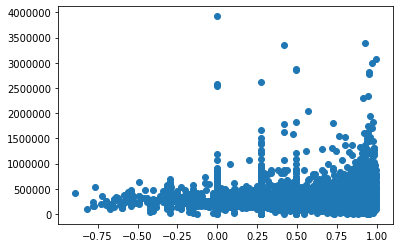

In [25]:
import matplotlib.pyplot as plt
plt.scatter(score, totPurchaseAmt)

Plotting the mean value for each bin

<BarContainer object of 60 artists>

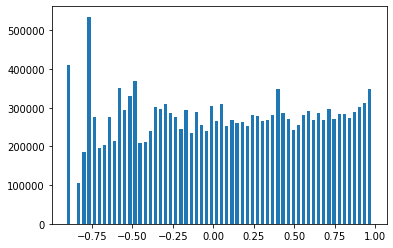

In [54]:
from scipy.stats import binned_statistic
bin_means, bin_edges, binnumber = binned_statistic(score, totPurchaseAmt, bins=60)

plt.bar(bin_edges[:-1], bin_means, width=0.02)

In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(score).reshape(-1, 1), totPurchaseAmt)
y = reg.predict(np.array(score).reshape(-1, 1))
print('MAE:', mean_absolute_error(totPurchaseAmt, y))

MAE: 103745.71441980943
